<a href="https://colab.research.google.com/github/hiraeth31/ML-labs/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 4

1. Преобразовать датасет (процессинг категориальных признаков, копия данных в df_not_processed, scale датасета)
2. Сделать k-means кластеризацию (записать cluster в df_not_processed, вывести статистику, графики. попробовать объяснить принцип кластеризации), оценить метриками, вывести результат
3. Подобрать оптимальное число кластеров с помощью "метод локтя", вывести статистику, графики, метрики, объяснить результат
4. Сделать DBSSCAN кластеризацию, подобрать оптимальные параметры, посчитать метрики, вывести статистику, объяснить результат
5. Ответить на вопрос - какой из методов кластеризации больше подходит для вашего датасета

# 1. Преобразование датасета

In [31]:
import pandas as pd

In [32]:
!pip install pandas seaborn scikit-learn

In [33]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [34]:
from sklearn.preprocessing import MinMaxScaler
# Выбираем числовые признаки
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [35]:
category_columns: list[str] = df.select_dtypes(include=['object']).columns # собираем колонки помеченные как objects

# Применяем One-Hot Encoding
df = pd.get_dummies(df, columns=category_columns, drop_first=True)

In [36]:
df

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,Occupation_Doctor,...,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder_Sleep Apnea
0,0.000000,0.00000,0.111111,0.4,0.20,0.6,0.571429,0.171429,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.002681,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,True,True,...,False,False,False,False,False,False,False,False,False,False
2,0.005362,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,True,True,...,False,False,False,False,False,False,False,False,False,False
3,0.008043,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,True,False,...,False,False,False,False,False,False,True,False,False,True
4,0.010724,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,True,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.989276,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True
370,0.991957,1.00000,0.814815,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True
371,0.994638,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True
372,0.997319,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True


# Сделать k-means кластеризацию (записать cluster в df_not_processed, вывести статистику, графики. попробовать объяснить принцип кластеризации), оценить метриками, вывести результат

In [37]:
!pip install ipywidgets plotly

In [38]:
X = df.to_numpy()

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import ipywidgets as widgets
from IPython.display import display, clear_output

def interactive_kmeans_visualization_3d(X, max_clusters=10, max_iterations=50):
    # Преобразуем DataFrame в numpy
    if isinstance(X, pd.DataFrame):
        X = X.values

    # Снижаем размерность до 3 компонент через PCA
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)

    def plot_kmeans_iteration(X_pca, centroids, labels=None, step=0):
        clear_output(wait=True)
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')

        if labels is not None:
            ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                       c=labels, cmap='viridis', s=30, alpha=0.6)
        else:
            ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                       s=30, alpha=0.6)

        ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
                   c='red', marker='x', s=100, label='Centroids')

        ax.set_title(f'K-means Iteration {step}', fontsize=14)
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        ax.legend()
        plt.show()

    def k_means_interactive(X_pca, k, max_iters):
        np.random.seed(42)
        centroids = X_pca[np.random.choice(X_pca.shape[0], k, replace=False)]
        for step in range(max_iters):
            distances = np.linalg.norm(X_pca[:, np.newaxis] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            plot_kmeans_iteration(X_pca, centroids, labels, step)
            new_centroids = np.array([X_pca[labels == i].mean(axis=0) for i in range(k)])
            if np.allclose(centroids, new_centroids, atol=1e-6):
                break
            centroids = new_centroids

    def run_kmeans(k, max_iters):
        k_means_interactive(X_pca, k, max_iters)

    # Ползунки
    k_slider = widgets.IntSlider(value=3, min=2, max=max_clusters, step=1, description='Clusters (k):')
    iter_slider = widgets.IntSlider(value=10, min=1, max=max_iterations, step=1, description='Max Iterations:')

    interactive_plot = widgets.interactive(run_kmeans, k=k_slider, max_iters=iter_slider)
    display(interactive_plot)

In [71]:
%matplotlib inline

interactive_kmeans_visualization_3d(X)

interactive(children=(IntSlider(value=3, description='Clusters (k):', max=10, min=2), IntSlider(value=10, desc…

Алгоритм
1. Определяет центры кластеров (или выбирает начальные точки)

2. Распределяет объекты по ближайшему кластеру

3. Пересчитывает центры

4. Повторяет процесс, пока кластеры не стабилизируются

# Теперь делаем саму кластеризацию

In [41]:
df_base = df.copy()
f_base = df_base.drop('Stress Level', axis=1)
df_base

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,Occupation_Doctor,...,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder_Sleep Apnea
0,0.000000,0.00000,0.111111,0.4,0.20,0.6,0.571429,0.171429,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.002681,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,True,True,...,False,False,False,False,False,False,False,False,False,False
2,0.005362,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,True,True,...,False,False,False,False,False,False,False,False,False,False
3,0.008043,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,True,False,...,False,False,False,False,False,False,True,False,False,True
4,0.010724,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,True,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.989276,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True
370,0.991957,1.00000,0.814815,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True
371,0.994638,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True
372,0.997319,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True


In [42]:
from sklearn.cluster import KMeans
import pandas as pd

# Обучаем K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X)

# Копируем исходный DataFrame
df_cluster = df_base.copy()

# Добавляем колонку с номерами кластеров
df_cluster['cluster'] = clusters

# Средние значения по каждому кластеру
cluster_means = df_cluster.groupby('cluster').mean()

cluster_means.round(2)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,Occupation_Doctor,...,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder_Sleep Apnea
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.44,0.41,0.52,0.73,0.55,0.34,0.18,0.58,0.46,0.01,...,0.01,0.00,0.01,0.01,0.19,0.00,0.00,0.0,0.00,0.05
1,0.86,0.84,0.48,0.70,0.87,0.50,0.31,0.77,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.91
2,0.15,0.17,0.63,0.62,0.62,0.57,0.29,0.66,1.00,0.88,...,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.0,0.04,0.08
3,0.57,0.51,0.23,0.40,0.23,0.80,0.39,0.40,0.79,0.00,...,0.00,0.04,0.02,0.00,0.00,0.00,0.00,0.0,0.00,0.13
4,0.76,0.72,0.90,0.97,0.08,0.03,0.00,0.29,0.16,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
5,0.14,0.14,0.10,0.36,0.04,0.99,0.42,0.30,1.00,0.87,...,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.0,0.00,0.06


In [75]:
# Вычисляем метрики
silhouette = silhouette_score(X, clusters)
davies_bouldin = davies_bouldin_score(X, clusters)
calinski = calinski_harabasz_score(X, clusters)
inertia = kmeans.inertia_

# Выводим результаты
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.2f}")
print(f"Inertia: {inertia:.2f}")

Silhouette Score: 0.430
Davies-Bouldin Index: 1.235
Calinski-Harabasz Index: 97.47
Inertia: 466.47


In [43]:
clusters

array([3, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 5, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 5, 5, 2, 5, 5, 2, 5, 5, 5, 5, 5, 5,
       0, 5, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 0, 0, 2, 0, 4, 4,
       4, 4, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3,
       3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4,

# Подобрать оптимальное число кластеров с помощью "метод локтя", вывести статистику, графики, метрики, объяснить результат

Метод локтя — это способ определить оптимальное количество кластеров k для алгоритма K-Means.

Про метрики

**inertia_ (внутренняя)** - Сумма квадратов расстояний до центров кластеров. Чем меньше — тем лучше.

**Silhouette Score** - Измеряет, насколько хорошо точки внутри кластера похожи друг на друга и отличаются от других кластеров. Значение от –1 до 1. Чем ближе к 1, тем лучше кластеризация.

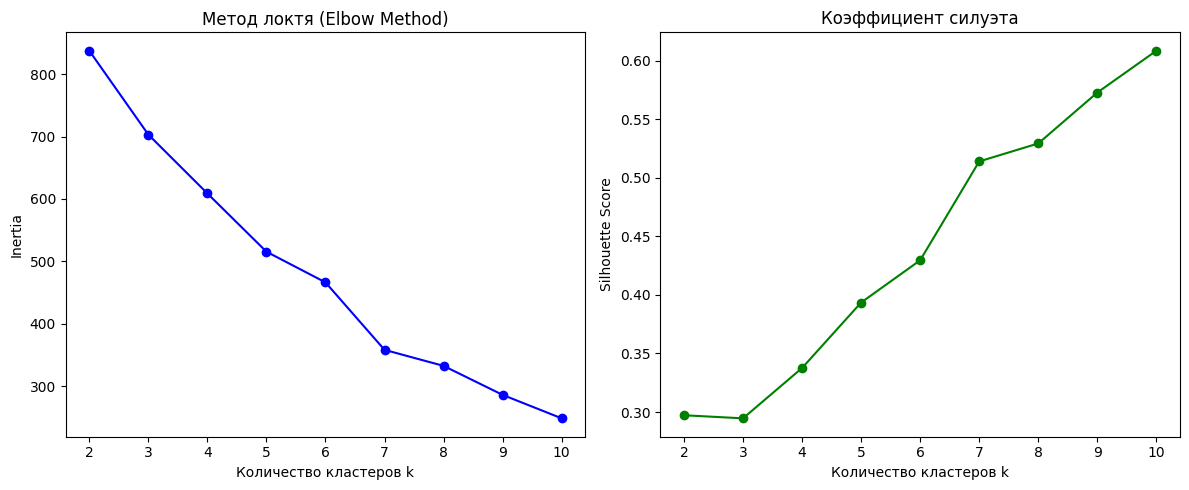

In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

inertias = []
silhouettes = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    inertias.append(kmeans.inertia_)  # внутренняя метрика K-Means
    silhouettes.append(silhouette_score(X, kmeans.labels_))  # внешняя метрика

# Визуализация "метода локтя"
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertias, 'bo-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя (Elbow Method)')

plt.subplot(1,2,2)
plt.plot(K, silhouettes, 'go-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette Score')
plt.title('Коэффициент силуэта')
plt.tight_layout()
plt.show()


Инерция (inertia) в алгоритме K-Means фактически представляет собой сумму дисперсий внутри каждого кластера — она показывает, насколько компактно сгруппированы точки вокруг центроидов. Чем ниже дисперсия внутри кластеров, тем лучше качество кластеризации.

## Описание метрик



Метод Локтя

Дисперсия падает примерно одинаково до 5 кластеров. Почти перестает падать с 7 до 10 кластеров. <br>
Формула подсчета
<br>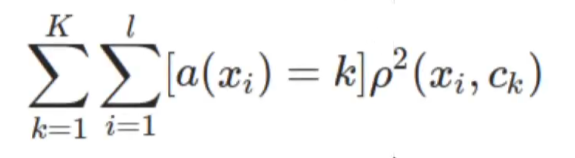

Мы идем по всем кластерам, по всем точкам. И если точка принадлежит кластеру, то считаем квадрат растояния. Полученные значения добавляются на график.

Оптимально брать пять кластеров.

Коэффицент силуэта.

Значение коэффицента силуэта говорит, что чем ближе значение к единице, тем лучше идет разбиение на кластеры. Самый большой скачок зафиксирован с 6 на 7. Но наибольшее значение находится на 10 кластерах.

# 4. Сделать DBSSCAN кластеризацию, подобрать оптимальные параметры, посчитать метрики, вывести статистику, объяснить результат

Для любого вектора X эпсилон окрестность определяется как множество точек находящихся от X не более чем на эпсилон. Формула ниже.

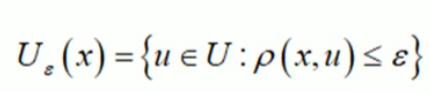

В этом алгоритме у нас есть три типа объектов:
<br>
Корневой - содержит в своей эпсилон окрестности не менее m объектов <br>
Граничный - не корневой, но лежит в окрестности корневого<br>
Шумовые - выбросы, не корневые и не граничные

Алгоритм работы
Задаём два параметра:

eps — радиус окрестности точки,

min_samples — минимальное количество точек, которые должны находиться в этой окрестности, чтобы область считалась “плотной”.

Берём любую точку:

1.Если в её радиусе eps находится ≥ min_samples точек → это ядро кластера.

2.Все точки, попавшие в этот радиус, присоединяются к тому же кластеру.

Расширяем кластер:

1.Для каждой новой точки из найденных повторяем шаг 2, добавляя соседей.

2.Так кластер “растёт”, пока не закончатся плотные точки.

3.Если точка не попала ни в один кластер → она шум (cluster = -1).

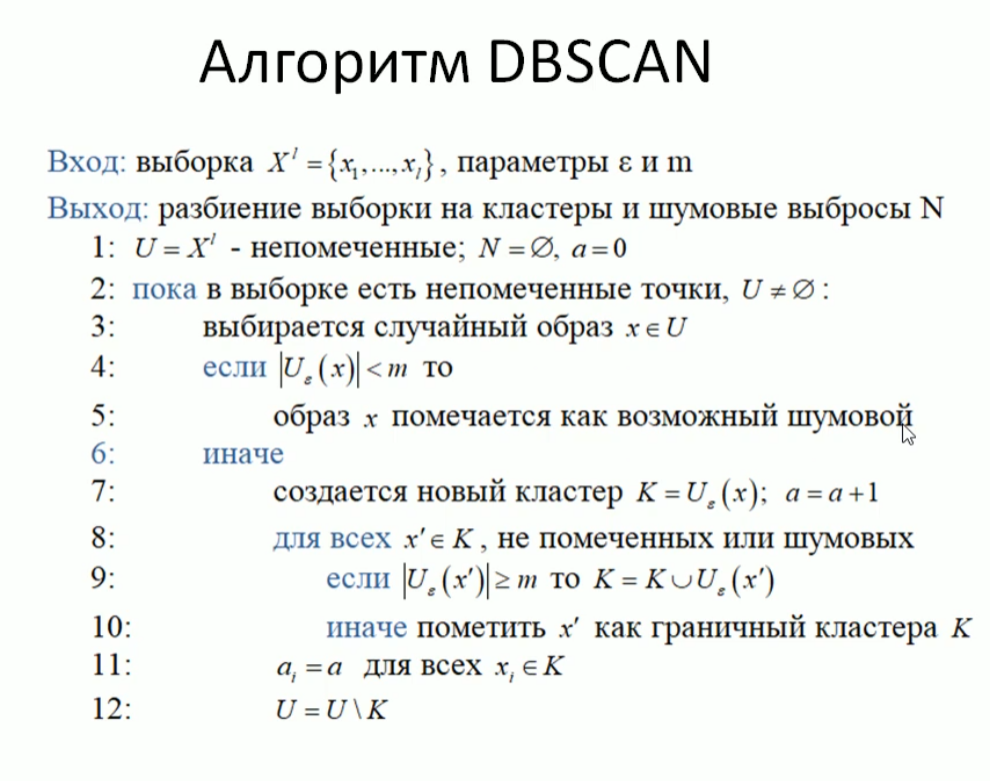

In [67]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np

# Обучаем DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=12)  # параметры можно подобрать
clusters = dbscan.fit_predict(X)

# Копируем исходный DataFrame
df_cluster = df_base.copy()

# Добавляем колонку с номерами кластеров
df_cluster['cluster'] = clusters

# Смотрим, какие кластеры сформировались
print("Количество найденных кластеров (без -1):", len(set(clusters)) - (1 if -1 in clusters else 0))
print("Количество выбросов (cluster = -1):", np.sum(clusters == -1))

# Средние значения по каждому кластеру
cluster_means = df_cluster.groupby('cluster').mean().round(2)

cluster_means

Количество найденных кластеров (без -1): 10
Количество выбросов (cluster = -1): 87


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,Occupation_Doctor,...,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder_Sleep Apnea
cluster,,,,,,,,,,,,,,,,,,,,,
-1,0.38,0.37,0.42,0.59,0.41,0.54,0.38,0.46,0.53,0.17,...,0.02,0.02,0.03,0.02,0.0,0.02,0.05,0.07,0.02,0.22
0,0.09,0.11,0.72,0.60,0.75,0.60,0.24,0.71,1.00,1.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
1,0.17,0.17,0.10,0.40,0.00,1.00,0.33,0.29,1.00,1.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
2,0.32,0.31,0.50,0.80,0.50,0.20,0.14,0.57,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
3,0.41,0.39,0.61,0.80,0.71,0.40,0.18,0.71,1.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
4,0.58,0.52,0.22,0.40,0.25,0.80,0.33,0.43,1.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
5,0.64,0.54,0.29,0.60,0.23,0.23,0.00,0.43,0.00,0.00,...,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,0.00,0.00
6,0.56,0.50,0.73,0.80,1.00,0.40,0.24,0.71,1.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
7,0.76,0.71,0.10,0.40,1.00,1.00,0.48,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,0.00,1.00


У нас получилось 87 выбросов при 10 кластерах.

## Теперь немного поиграемся с параметрами, чтобы снизить количество выбросов.

In [66]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np

# Обучаем DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=4)  # параметры можно подобрать
clusters = dbscan.fit_predict(X)

# Копируем исходный DataFrame
df_cluster = df_base.copy()

# Добавляем колонку с номерами кластеров
df_cluster['cluster'] = clusters

# Смотрим, какие кластеры сформировались
print("Количество найденных кластеров (без -1):", len(set(clusters)) - (1 if -1 in clusters else 0))
print("Количество выбросов (cluster = -1):", np.sum(clusters == -1))

# Средние значения по каждому кластеру
cluster_means = df_cluster.groupby('cluster').mean().round(2)

cluster_means

Количество найденных кластеров (без -1): 7
Количество выбросов (cluster = -1): 42


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,Occupation_Doctor,...,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder_Sleep Apnea
cluster,,,,,,,,,,,,,,,,,,,,,
-1,0.35,0.34,0.41,0.50,0.38,0.55,0.53,0.32,0.50,0.14,...,0.05,0.05,0.07,0.05,0.0,0.05,0.1,0.0,0.05,0.31
0,0.11,0.12,0.40,0.50,0.38,0.80,0.28,0.56,1.00,1.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.03
1,0.22,0.24,0.67,0.80,0.47,0.20,0.21,0.67,1.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00
2,0.32,0.31,0.51,0.80,0.50,0.22,0.16,0.57,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.03
3,0.76,0.72,0.90,0.97,0.08,0.03,0.00,0.29,0.16,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00
4,0.52,0.48,0.48,0.65,0.57,0.56,0.25,0.60,0.94,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.03
5,0.64,0.54,0.29,0.60,0.23,0.23,0.00,0.43,0.00,0.00,...,0.00,0.00,0.00,0.00,1.0,0.00,0.0,0.0,0.00,0.00
6,0.86,0.84,0.48,0.70,0.87,0.50,0.31,0.77,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.0,1.0,0.00,0.91


Здесь у нас получилось снизить количество выбросов до 42 при 7 кластерах.

Кластер 0 - Доктора с высоким стрессом, все мужчины <br>
Кластер 1 - Мужчины с хорошим качеством сна <br>
Кластер 2 - Женщины с хорошим качеством сна и средней физической активностью <br>
Кластер 3 - Пожилые люди с отличным качесвтом сна, в основном женщины <br>
Кластер 4 - Почти все мужчины, имеют средние показатели стресса, физической активности, качества сна, количества шагов в день <br>
Кластер 5 - Женщины среднего возраста с недосыпом, низкой физической активностью, низким уровнем стресса <br>
Кластер 6 - Пожилые люди с высокой физической активностью, средним уровнем стресса, большим количеством шагов<br>


In [68]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def interactive_dbscan_visualization_pca2d(X):
    # Преобразуем DataFrame в numpy
    if isinstance(X, pd.DataFrame):
        X = X.values

    # Масштабируем данные (DBSCAN чувствителен к масштабу!)
    X_scaled = StandardScaler().fit_transform(X)

    # Уменьшаем размерность до 2D через PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    def plot_dbscan(X_pca, labels, core_samples_mask, eps, min_samples, metric):
        clear_output(wait=True)
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        plt.figure(figsize=(8, 6))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Черный цвет для шума
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X_pca[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=12)

            xy = X_pca[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

        plt.title(f'DBSCAN (PCA 2D): eps={eps}, min_samples={min_samples}, metric={metric}')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.grid(True, alpha=0.3)
        plt.show()

    def run_dbscan(eps, min_samples, metric):
        # Обучение DBSCAN на данных после PCA
        db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
        db.fit(X_pca)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        plot_dbscan(X_pca, labels, core_samples_mask, eps, min_samples, metric)

    # Виджеты для параметров
    eps_slider = widgets.FloatSlider(value=0.5, min=0.1, max=2.0, step=0.1, description='eps:')
    min_samples_slider = widgets.IntSlider(value=5, min=1, max=30, step=1, description='min_samples:')
    metric_dropdown = widgets.Dropdown(
        options=['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
        value='euclidean', description='metric:'
    )

    ui = widgets.VBox([eps_slider, min_samples_slider, metric_dropdown])
    out = widgets.interactive_output(run_dbscan, {
        'eps': eps_slider,
        'min_samples': min_samples_slider,
        'metric': metric_dropdown
    })
    display(ui, out)

    interactive_dbscan_visualization_pca2d(X)


In [69]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Обучаем DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

# Добавляем кластеры в DataFrame
df_cluster = df_base.copy()
df_cluster['cluster'] = clusters

# Убираем выбросы (-1) перед метриками
mask = clusters != -1
X_valid = X[mask]
labels_valid = clusters[mask]

if len(set(labels_valid)) > 1:  # нужно хотя бы 2 кластера для оценки
    sil = silhouette_score(X_valid, labels_valid)
    dbi = davies_bouldin_score(X_valid, labels_valid)
    chi = calinski_harabasz_score(X_valid, labels_valid)

    print(f"Silhouette Score: {sil:.3f}")
    print(f"Davies-Bouldin Index: {dbi:.3f}")
    print(f"Calinski-Harabasz Index: {chi:.3f}")
else:
    print("Недостаточно кластеров для расчёта метрик.")


Silhouette Score: 0.938
Davies-Bouldin Index: 0.080
Calinski-Harabasz Index: 11002.140


# Ответить на вопрос - какой из методов кластеризации больше подходит для вашего датасета

Результаты по k-means

Метрики: <br>
Silhouette Score показывает, насколько хорошо каждая точка принадлежит своему кластеру
и насколько далеко она от соседнего кластера.
Silhouette Score: 0.430 - не очень, далеко от единицы <br>

Davies-Bouldin Index измеряет, насколько “похожи” кластеры между собой,
учитывая их плотность и расстояния между центрами.
Davies-Bouldin Index: 1.235 - должно быть близко к нулю, у нас получилось не очень <br>

Calinski-Harabasz Index сравнивает разброс между кластерами и внутри них.
Показывает, насколько кластеры плотные и отделённые.
Calinski-Harabasz Index: 97.47 - не сказать, что плохо, но могло быть и больше

Итоговые результаты по DBSCAN

При заданных значениях:
eps - 1.5
min_samples - 4
Получилось 7 кластеров и 42 выброса.

Метрики: <br>
Silhouette Score показывает, насколько хорошо каждая точка принадлежит своему кластеру
и насколько далеко она от соседнего кластера.
Silhouette Score: 0.938 - близко к единице, хороший показатель <br>

Davies-Bouldin Index измеряет, насколько “похожи” кластеры между собой,
учитывая их плотность и расстояния между центрами.
Davies-Bouldin Index: 0.080 - близко к нулю, хороший показатель <br>

Calinski-Harabasz Index сравнивает разброс между кластерами и внутри них.
Показывает, насколько кластеры плотные и отделённые.
Calinski-Harabasz Index: 11002.140 - хороший показатель, чем больше - тем лучше